#  DATA EXPLORATION 

----------

Sleep apnea is a very common condtion  and its thought to affect about 30 % of the people. The most common symptons of Sleep apnea are snoring ,choking or gasping during sleep.

Patients with obstructive sleep apnea partially or totally obstruct their Airway many times during the course of the night. When the obstruction is partial you snore if the obstruction is complete then you have an apnea which is the sessation of all air flow. When the air flow is interepted the flow of oxygen to the lungs and therefore to  the body is also interrupted
Untreated significant sleep apnea can be life threatening its associated with increase risk of Hypertension, Diabetis , Stroke as well as motor vehical accidents

SLEEP APNEA SYMPTOMS
* <b> Snoring </b>
* <b> Excessive daytime sleepiness </b>
* <b> Feeling un-refreshed in the morning  </b>
* <b> Morning Headaches</b>
* <b> Stop breathing during sleepapnea</b>
* <b> Choking or gasping during sleep  </b>
* <b> Awakening with dry mouth or sore throat</b>
* <b> Impaired emotional or mental functioning </b>
* <b> Poor concentration and forgetfulness </b>
* <b> Difficulty staying asleep</b>
* <b> Type II Diabetes  </b>
* <b> Hypertension</b>
* <b> Overweight </b>

----------

In [0]:
!pip install pyedflib

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import xml.etree.ElementTree as ET
import pyedflib
import os
!unzip sample.zip
!ls

In [54]:
print(os.listdir("data/"))

['stage', 'apnea', 'flow']


In [0]:
mesa_path1 = "data/apnea/mesa-sleep-0001-profusion.xml"
mesa_path2 = "data/stage/mesa-sleep-0001-nsrr.xml"
edf_path = "data/flow/mesa-sleep-0001.edf"

 ### EXTRACT DATA FROM APNEA FOLDER XML FILE
 
 --------------

In [0]:
def perf_func(elem, func, level=0):
    func(elem,level)
    for child in elem:
        perf_func(child, func, level+1)

In [0]:
def print_level(elem,level):
    print ('|'+'------'*level+ '->'+elem.tag)

In [0]:
tree = ET.parse(mesa_path1)
root = tree.getroot()

In [0]:
# print(perf_func(root, print_level))

We need to extract data containing label ="Hypopnea" which indicates that apnea occured to a patient at some point 
1. <b> Name</b> - We will select labels with Name = "Hypopnea
2. <b> Input</b>-  Airflow signal is used to diagonose sleep apnea
3. <b> Start</b> -  Sarting time
4. <b> Duration </b>- Total Duration

----------------

In [59]:
ts1=[]
ts2=[]
ts3=[]
ts4=[]
for child in root.iter('ScoredEvent'):
    ts = child.find('Duration').text
    ts1.append(ts)
    t2=child.find('Input').text
    ts2.append(t2)
    t3=child.find('Name').text
    ts3.append(t3)
    t4=child.find('Start').text
    ts4.append(t4)
df1=pd.DataFrame({'Duration': ts1,'Input': ts2,'Name': ts3,'Start':ts4,})
df1=df1.loc[(df1['Name'] == 'Hypopnea')]
df1 = df1.reset_index(drop=True)
df1.head()

,Duration,Input,Name,Start
0,12.3,Flow,Hypopnea,6114.7
1,11.1,Flow,Hypopnea,6188.9
2,12,Flow,Hypopnea,5489.7
3,10.7,Flow,Hypopnea,5552.1
4,11.2,Flow,Hypopnea,5573.4


###  ANALYSE EDF FILE IN EDF BROWSER


---------------

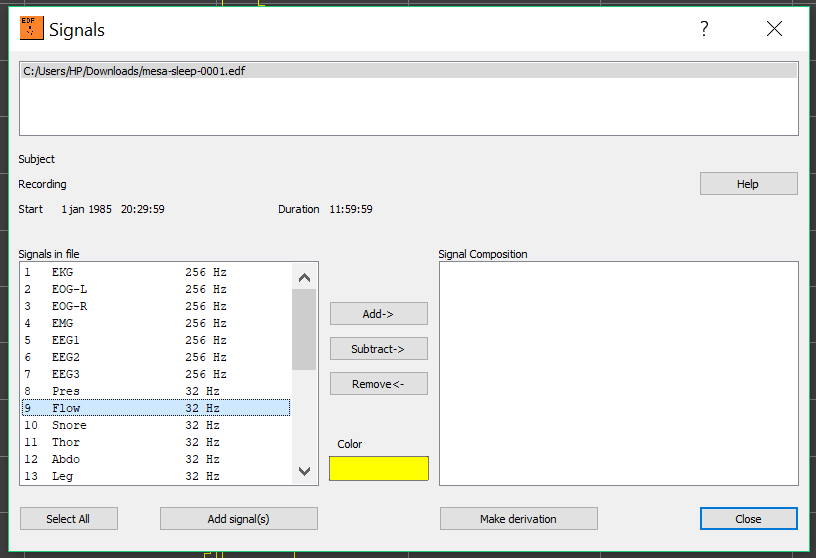

In [48]:
from IPython.display import Image
Image('signal1.png', width=600, height=450)


*  Above image shows the browser view of edf file , as we can see the list of signal files and sampling frequency of all signals respectively.

*   We need to get data of Flow signal which is 9th and has sampling  frequency of 32


[pyEDFlib](https://github.com/holgern/pyedflib) is a python library to read/write EDF+/BDF+ files based on EDFlib.This Library provides diffrent [commands](https://github.com/holgern/pyedflib/blob/master/demo/readEDFFile.py) to interact with edf files.
For ex :-


*    f.signals_in_file() - To get all signals in edf file
*    f.file_duration()    - Duration of file


*   f.datarecords_in_file() - Total no of records in file
*   f.getSampleFrequency() - Sampling frequency of Signal













### GET AIR FLOW DATA FROM  EDF FILE

----------------------

In [69]:

file = pyedflib.EdfReader(edf_path)
sampling_freq=file.getSampleFrequency(8)
signal_data=file.readSignal(8)
t=np.arange(0,len(signal_data))/sampling_freq
file._close()
df= pd.DataFrame({'Flow': signal_data,'Time': t})
df.head()
  


,Flow,Time
0,-0.069856,0.00000
1,-0.089265,0.03125
2,-0.090181,0.06250
3,-0.091646,0.09375
4,-0.093843,0.12500


###  PARSE DATA FROM SLEEP STAGES XML FILE

----------------------

In [0]:
tree1 = ET.parse(mesa_path2)
root1 = tree1.getroot()

In [0]:
# print(perf_func(root1, print_level))

In [72]:
ps1=[]
ps2=[]
ps3=[]
ps4=[]
for child in root1.iter('ScoredEvent'):
    t1=child[0].text
    ps1.append(t1)
    t2=child[1].text
    ps2.append(t2)
    t3=child[2].text
    ps3.append(t3)
    t4=child[3].text
    ps4.append(t4)
df2=pd.DataFrame({'Type': ps1,'Stages': ps2,'Start': ps3,'Duration':ps4,})
df2=df2.loc[(df2['Type'] == 'Stages|Stages')]
df2 = df2.reset_index(drop=True)
df2.head()

,Duration,Stages,Start,Type
0,5190.0,Wake|0,0.0,Stages|Stages
1,30.0,Stage 1 sleep|1,5190.0,Stages|Stages
2,90.0,Wake|0,5220.0,Stages|Stages
3,60.0,Stage 1 sleep|1,5310.0,Stages|Stages
4,90.0,Stage 2 sleep|2,5370.0,Stages|Stages


###  MERGE ALL THREE DATAFRAME

-----------------

In [73]:
output =  pd.concat([df , df1[['Name']],df2[['Type']]] , axis=1)
output.head()

,Flow,Time,Name,Type
0,-0.069856,0.00000,Hypopnea,Stages|Stages
1,-0.089265,0.03125,Hypopnea,Stages|Stages
2,-0.090181,0.06250,Hypopnea,Stages|Stages
3,-0.091646,0.09375,Hypopnea,Stages|Stages
4,-0.093843,0.12500,Hypopnea,Stages|Stages


###  OUTPUT

--------------

CONVERT CATEGORIES INTO NUMERICAL VALUE 

In [68]:
output['Name']=0
output['Type']=0
output.head(10)

,Flow,Time,Name,Type
0,-0.069856,0.00000,0,0
1,-0.089265,0.03125,0,0
2,-0.090181,0.06250,0,0
3,-0.091646,0.09375,0,0
4,-0.093843,0.12500,0,0
5,-0.096773,0.15625,0,0
6,-0.098238,0.18750,0,0
7,-0.097688,0.21875,0,0
8,-0.095857,0.25000,0,0
9,-0.089815,0.28125,0,0
